<a href="https://colab.research.google.com/github/calvinUBB/Kerja-Praktek/blob/master/citra_daging_ayam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import zipfile

In [0]:
# Ekstraksi file zip dataset citra daging ayam dalam google drive
local_zip = '/content/drive/My Drive/citra-daging-ayam/citra-dada-ayam.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/My Drive/citra-daging-ayam/citra-dada-ayam')
zip_ref.close()

In [0]:
# Menampilkan folder yang ada dalam direktori citra dada ayam
print(os.listdir('/content/drive/My Drive/citra-daging-ayam/citra-dada-ayam'))

['validation', 'training']


In [0]:
# Direktori dataset citra daging ayam
data_dir = '/content/drive/My Drive/citra-daging-ayam/citra-dada-ayam/'

# Pendefinisian direktori data latih/training set
train_rotten_data_dir = os.path.join(data_dir + 'training/dada-ayam-busuk/')
train_fresh_data_dir = os.path.join(data_dir + 'training/dada-ayam-segar/')

# Pendefinisian direktori data validasi/validation set
validation_rotten_data_dir = os.path.join(data_dir + 'validation/dada-ayam-busuk/')
validation_fresh_data_dir = os.path.join(data_dir + 'validation/dada-ayam-segar/')

In [0]:
# Menampilkan jumlah citra pada setiap direktori
print(len(os.listdir(train_rotten_data_dir)))
print(len(os.listdir(train_fresh_data_dir)))
print(len(os.listdir(validation_rotten_data_dir)))
print(len(os.listdir(validation_fresh_data_dir)))

40
40
5
5


In [0]:
# List nama file citra daging ayam dengan label busuk
train_rotten_data_names = os.listdir(data_dir + 'training/dada-ayam-busuk/') 
print(train_rotten_data_names[:10])

# List nama file citra daging ayam dengan label segar
train_fresh_data_names = os.listdir(data_dir + 'training/dada-ayam-segar/')
print(train_fresh_data_names[:10])

['busuk (1).jpg', 'busuk (10).jpg', 'busuk (11).jpg', 'busuk (12).jpg', 'busuk (13).jpg', 'busuk (14).jpg', 'busuk (15).jpg', 'busuk (16).jpg', 'busuk (17).jpg', 'busuk (18).jpg']
['segar (1).jpg', 'segar (10).jpg', 'segar (11).jpg', 'segar (12).jpg', 'segar (13).jpg', 'segar (14).jpg', 'segar (15).jpg', 'segar (16).jpg', 'segar (17).jpg', 'segar (18).jpg']


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameter untuk grafik; citra akan ditampilkan dalam 4x4
nrows = 4
ncols = 4

# Index untuk iterasi citra
pic_index = 0

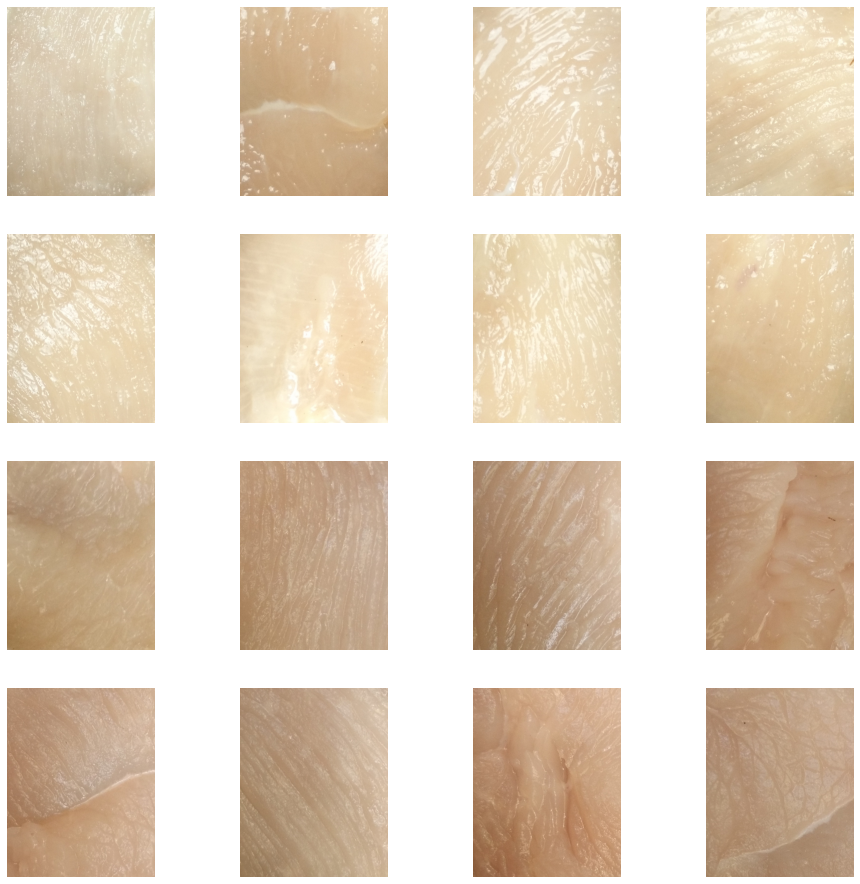

In [0]:
# Mengatur fig matplotlib dan mengatur ukuran agar sesuai dengan citra 4x4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_rotten_pix = [os.path.join(train_rotten_data_dir, fname) 
                for fname in train_rotten_data_names[pic_index-8:pic_index]]
next_fresh_pix = [os.path.join(train_fresh_data_dir, fname) 
                for fname in train_fresh_data_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_rotten_pix+next_fresh_pix):
  # Set up subplot; indeks subplot mulai dari 1
  # Mengatur subplot; 
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off'))

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
import tensorflow as tf

In [0]:
# Callback agar model CNN berhenti menjalankan proses training saat mencapai nilai akurasi 99%
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nAkurasi telah mencapai 99% membatalkan proses training")
      self.model.stop_training = True

callbacks = MyCallback()

In [0]:
# Model CNN percobaan 1
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', 
                           input_shape=(600, 600, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 598, 598, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 299, 299, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 297, 297, 32)      4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 341056)           

In [0]:
# Model CNN percobaan 2
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', 
                           input_shape=(600, 600, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

ResourceExhaustedError: ignored

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) # normaslisasi citra daging ayam
train_generator = train_datagen.flow_from_directory(
    data_dir+'training/',
    target_size=(600, 600), # resize citra daging ayam
    batch_size=16,
    class_mode='binary'    
)

validation_datagen = ImageDataGenerator(rescale=1./255) # normaslisasi citra daging ayam
validation_generator = validation_datagen.flow_from_directory(
    data_dir+'validation/',
    target_size=(600, 600), # resize citra daging ayam
    batch_size=2,
    class_mode='binary'
)

Found 80 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [0]:
# menampilkan array citra daging ayam (pengecekan proses normalisasi)
print(train_generator[0])

(array([[[[0.63529414, 0.5137255 , 0.4039216 ],
         [0.65882355, 0.5372549 , 0.427451  ],
         [0.65882355, 0.5372549 , 0.427451  ],
         ...,
         [0.8313726 , 0.74509805, 0.6627451 ],
         [0.81568635, 0.7294118 , 0.64705884],
         [0.8196079 , 0.73333335, 0.6509804 ]],

        [[0.6666667 , 0.54509807, 0.43529415],
         [0.6745098 , 0.5529412 , 0.4431373 ],
         [0.6627451 , 0.5411765 , 0.43137258],
         ...,
         [0.82745105, 0.7411765 , 0.65882355],
         [0.81568635, 0.7294118 , 0.64705884],
         [0.8196079 , 0.7294118 , 0.65882355]],

        [[0.6509804 , 0.5176471 , 0.41176474],
         [0.67058825, 0.5372549 , 0.43137258],
         [0.68235296, 0.54901963, 0.4431373 ],
         ...,
         [0.854902  , 0.7725491 , 0.6901961 ],
         [0.8235295 , 0.7411765 , 0.6666667 ],
         [0.81568635, 0.73333335, 0.65882355]],

        ...,

        [[0.5647059 , 0.44705886, 0.3137255 ],
         [0.57254905, 0.454902  , 0.32156864

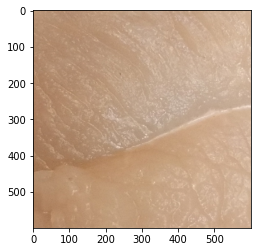

In [0]:
# pengecekan representasi angka dari label citra daging ayam
import matplotlib.pyplot as plt
plt.imshow(train_generator[0][0][9])
# 0 adalah citra daging ayam busuk dan 1 adalah citra daging ayam segar

In [0]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    steps_per_epoch=5,
    validation_steps=5,
    verbose=1,
)

Epoch 1/15
5/5 [==============================] - 1s 298ms/step - loss: 113.6487 - acc: 0.5500 - val_loss: 7.1634 - val_acc: 0.5000
Epoch 2/15
5/5 [==============================] - 1s 278ms/step - loss: 7.2594 - acc: 0.5000 - val_loss: 2.7389 - val_acc: 0.5000
Epoch 3/15
5/5 [==============================] - 1s 284ms/step - loss: 2.7425 - acc: 0.4500 - val_loss: 1.9663 - val_acc: 0.5000
Epoch 4/15
5/5 [==============================] - 1s 287ms/step - loss: 1.1494 - acc: 0.5250 - val_loss: 1.1875 - val_acc: 0.5000
Epoch 5/15
5/5 [==============================] - 1s 285ms/step - loss: 1.1384 - acc: 0.5125 - val_loss: 0.6324 - val_acc: 0.5000
Epoch 6/15
5/5 [==============================] - 1s 284ms/step - loss: 0.8722 - acc: 0.6625 - val_loss: 6.0201 - val_acc: 0.5000
Epoch 7/15
5/5 [==============================] - 1s 286ms/step - loss: 2.0197 - acc: 0.6625 - val_loss: 1.4220 - val_acc: 0.5000
Epoch 8/15
5/5 [==============================] - 1s 281ms/step - loss: 0.7963 - acc: 0.

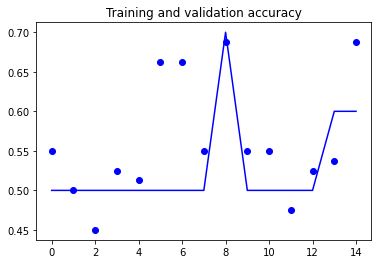

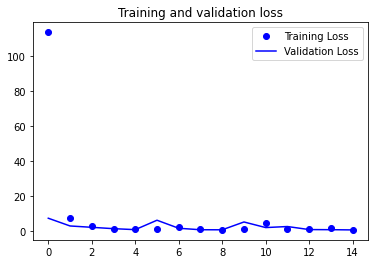

In [0]:
# menampilkan grafik training dan validasi akurasi dan loss training dan validasi beradsarkan setiap epoch
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

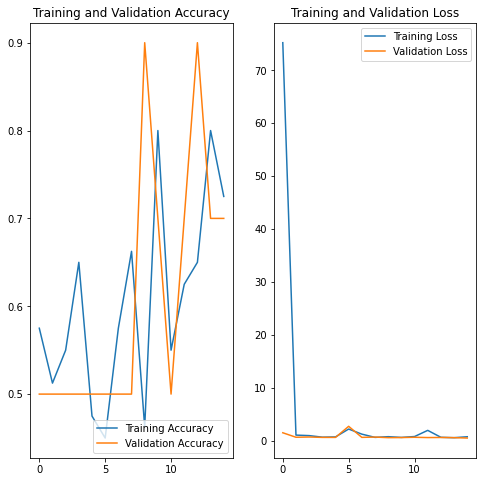

In [0]:
# menampilkan grafik training dan validasi akurasi dan loss training dan validasi beradsarkan setiap epoch
# grafik garis
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
# pengujian data testing dengan proses upload data citra pada google colab
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(600, 600))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a fresh")
  else:
    print(fn + " is a rotten")

Saving busuk (46).jpg to busuk (46) (5).jpg
Saving busuk (47).jpg to busuk (47) (5).jpg
Saving busuk (48).jpg to busuk (48) (5).jpg
Saving busuk (49).jpg to busuk (49) (5).jpg
Saving busuk (50).jpg to busuk (50) (5).jpg
Saving segar (46).jpg to segar (46) (5).jpg
Saving segar (47).jpg to segar (47) (5).jpg
Saving segar (48).jpg to segar (48) (5).jpg
Saving segar (49).jpg to segar (49) (5).jpg
Saving segar (50).jpg to segar (50) (5).jpg
[0.]
busuk (46).jpg is a rotten
[0.]
busuk (47).jpg is a rotten
[0.]
busuk (48).jpg is a rotten
[0.]
busuk (49).jpg is a rotten
[0.]
busuk (50).jpg is a rotten
[0.]
segar (46).jpg is a rotten
[0.]
segar (47).jpg is a rotten
[0.]
segar (48).jpg is a rotten
[0.]
segar (49).jpg is a rotten
[0.]
segar (50).jpg is a rotten
